In [ ]:
'''
Author: ChenHJ
Date: 2022-12-24 10:20:22
LastEditors: ChenHJ
LastEditTime: 2022-12-24 10:20:48
FilePath: /0302code/CMIIP_divide_SASMR_group.ipynb
Aim: 
  12/24/2022:
  本程序用于计算分组的模式。
  1）对比北部路径好、坏模式在西风急流的模拟上的差异
  2）对比南部路径好、坏模式在海温模拟上的差异
Mission: 
'''
from mailbox import _PartialFile
import numpy as np
import xarray as xr
import os
import re
from cdo import *
import shutil
import sys

sys.path.append("/home/ys17-23/chenhj/self_def/")
import plot as sepl
import cal as ca
import pandas as pd
from importlib import reload

import metpy.calc as mpcalc
import metpy.constants as constants
import geocat.comp
from windspharm.xarray import VectorWind
import skill_metrics as sm
from brokenaxes import brokenaxes

reload(sepl)

# sd.path.append("/home/ys17-23/chenhj/1201code/self_def.py")

cdo = Cdo

# for plot
import proplot as pplt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter
from cartopy.mpl.ticker import LatitudeFormatter
from cartopy.util import add_cyclic_point
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy import signal
from eofs.multivariate.standard import MultivariateEof
from eofs.standard import Eof
import statsmodels.api as sm

## 读取数据

### 观测偏回归

In [ ]:
pre_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/pre_north_south_partial_correlation.nc")
hgt_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/hgt_north_south_partial_correlation.nc")
u_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/u_north_south_partial_correlation.nc")
v_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/v_north_south_partial_correlation.nc")
sstDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstDJF_north_south_partial_correlation.nc")
sstMAM_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstMAM_north_south_partial_correlation.nc")
sstJJA_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstJJA_north_south_partial_correlation.nc")
sstSON_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstSON_north_south_partial_correlation.nc")
sstnDJF_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/sstnDJF_north_south_partial_correlation.nc")

IndR_ERA5_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_hgt_regress.nc")
IndR_ERA5_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_u_regress.nc")
IndR_ERA5_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/GPCP/detrend/IndR_ERA5_v_regress.nc")

In [ ]:
pre_north_south_slope = pre_north_south_partial_correlation["slope"]
hgt_north_south_slope = hgt_north_south_partial_correlation["slope"]
u_north_south_slope = u_north_south_partial_correlation["slope"]
v_north_south_slope = v_north_south_partial_correlation["slope"]
sstDJF_north_south_slope = sstDJF_north_south_partial_correlation["slope"]
sstMAM_north_south_slope = sstMAM_north_south_partial_correlation["slope"]
sstJJA_north_south_slope = sstJJA_north_south_partial_correlation["slope"]
sstSON_north_south_slope = sstSON_north_south_partial_correlation["slope"]
sstnDJF_north_south_slope = sstnDJF_north_south_partial_correlation["slope"]

pre_north_south_pvalue = pre_north_south_partial_correlation["pvalue"]
hgt_north_south_pvalue = hgt_north_south_partial_correlation["pvalue"]
u_north_south_pvalue = u_north_south_partial_correlation["pvalue"]
v_north_south_pvalue = v_north_south_partial_correlation["pvalue"]
sstDJF_north_south_pvalue = sstDJF_north_south_partial_correlation["pvalue"]
sstMAM_north_south_pvalue = sstMAM_north_south_partial_correlation["pvalue"]
sstJJA_north_south_pvalue = sstJJA_north_south_partial_correlation["pvalue"]
sstSON_north_south_pvalue = sstSON_north_south_partial_correlation["pvalue"]
sstnDJF_north_south_pvalue = sstnDJF_north_south_partial_correlation["pvalue"]

IndR_ERA5_hgt_slope = IndR_ERA5_hgt_regress["slope"]
IndR_ERA5_hgt_rvalue = IndR_ERA5_hgt_regress["rvalue"]
IndR_ERA5_hgt_pvalue = IndR_ERA5_hgt_regress["pvalue"]

IndR_ERA5_u_slope = IndR_ERA5_u_regress["slope"]
IndR_ERA5_u_rvalue = IndR_ERA5_u_regress["rvalue"]
IndR_ERA5_u_pvalue = IndR_ERA5_u_regress["pvalue"]

IndR_ERA5_v_slope = IndR_ERA5_v_regress["slope"]
IndR_ERA5_v_rvalue = IndR_ERA5_v_regress["rvalue"]
IndR_ERA5_v_pvalue = IndR_ERA5_v_regress["pvalue"]

### historical

In [ ]:
fprehis = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/pr_historical_r144x72_195001-201412.nc")
prehis_JJA = fprehis["pr"].sel(time=fprehis["time"].dt.year>=1979)
prehis_JJA.attrs["units"] = "mm/day"
prehis_JJA.attrs["standard_name"] = "precipitation"

fhgthis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/zg_historical_r144x72_195001-201412.nc")
hgthis_ver_JJA = fhgthis_ver_JJA["zg"].sel(time=fhgthis_ver_JJA["time"].dt.year>=1979)

fuhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/ua_historical_r144x72_195001-201412.nc")
uhis_ver_JJA = fuhis_ver_JJA["ua"].sel(time=fuhis_ver_JJA["time"].dt.year>=1979)

fvhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/va_historical_r144x72_195001-201412.nc")
vhis_ver_JJA = fvhis_ver_JJA["va"].sel(time=fvhis_ver_JJA["time"].dt.year>=1979)

fwhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/wap_historical_r144x72_195001-201412.nc") 
whis_ver_JJA = fwhis_ver_JJA["wap"].sel(time=fwhis_ver_JJA["time"].dt.year>=1979)

fssthis_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/tos_historical_r144x72_195001-201412.nc")
ssthis_JJA = fssthis_JJA["tos"].sel(time=fssthis_JJA["time"].dt.year>=1979)

fthis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/ta_historical_r144x72_195001-201412.nc")
this_ver_JJA = fthis_ver_JJA["ta"].sel(time=fthis_ver_JJA["time"].dt.year>=1979)

fuqhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/his_uq_dpg.nc")
uqhis_ver_JJA = fuqhis_ver_JJA["uq_dpg"].sel(time=fuqhis_ver_JJA["time"].dt.year>=1979)

fvqhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/his_vq_dpg.nc")
vqhis_ver_JJA = fvqhis_ver_JJA["vq_dpg"].sel(time=fvqhis_ver_JJA["time"].dt.year>=1979)

fuqvqdivhis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/his_div_uqvq.nc")
uqvqdivhis_ver_JJA = fuqvqdivhis_ver_JJA["div_uqvq"].sel(time=fuqvqdivhis_ver_JJA["time"].dt.year>=1979)

fsphis_ver_JJA = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/CMIP6/historical/tmp_var/JJA/non_detrend/ps_historical_r144x72_195001-201412.nc")
sphis_ver_JJA = fsphis_ver_JJA["ps"].sel(time=fsphis_ver_JJA["time"].dt.year>=1979)

divhis_ver_JJA = ca.cal_divergence(uhis_ver_JJA.sel(level=[200.0, 850.0]), vhis_ver_JJA.sel(level=[200.0, 850.0]))

### historical 偏回归

In [ ]:
pre_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/pre_his_north_south_partial_correlation.nc")
hgt_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/hgt_his_north_south_partial_correlation.nc")
u_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/u_his_north_south_partial_correlation.nc")
v_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/v_his_north_south_partial_correlation.nc")

sstDJF_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstDJF_his_north_south_partial_correlation.nc")
sstMAM_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstMAM_his_north_south_partial_correlation.nc")
sstJJA_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstJJA_his_north_south_partial_correlation.nc")
sstSON_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstSON_his_north_south_partial_correlation.nc")
sstnDJF_his_north_south_partial_correlation = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/sstnDJF_his_north_south_partial_correlation.nc")

IndR_his_pre_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_pre_regress.nc")
IndR_his_hgt_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_hgt_regress.nc")
IndR_his_u_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_u_regress.nc")
IndR_his_v_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_v_regress.nc")
IndR_his_sstDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstDJF_regress.nc")
IndR_his_sstMAM_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstMAM_regress.nc")
IndR_his_sstJJA_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstJJA_regress.nc")
IndR_his_sstSON_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstSON_regress.nc")
IndR_his_sstnDJF_regress = xr.open_dataset("/home/ys17-23/Extension/personal-data/chenhj/SAM_EAM_data/SASMR_reg_result/CMIP6/detrend/IndR_his_sstnDJF_regress.nc")

In [ ]:
pre_his_north_south_slope = pre_his_north_south_partial_correlation["slope"]
hgt_his_north_south_slope = hgt_his_north_south_partial_correlation["slope"]
u_his_north_south_slope = u_his_north_south_partial_correlation["slope"]
v_his_north_south_slope = v_his_north_south_partial_correlation["slope"]
sstDJF_his_north_south_slope = sstDJF_his_north_south_partial_correlation["slope"]
sstMAM_his_north_south_slope = sstMAM_his_north_south_partial_correlation["slope"]
sstJJA_his_north_south_slope = sstJJA_his_north_south_partial_correlation["slope"]
sstSON_his_north_south_slope = sstSON_his_north_south_partial_correlation["slope"]
sstnDJF_his_north_south_slope = sstnDJF_his_north_south_partial_correlation["slope"]

pre_his_north_south_pvalue = pre_his_north_south_partial_correlation["pvalue"]
hgt_his_north_south_pvalue = hgt_his_north_south_partial_correlation["pvalue"]
u_his_north_south_pvalue = u_his_north_south_partial_correlation["pvalue"]
v_his_north_south_pvalue = v_his_north_south_partial_correlation["pvalue"]
sstDJF_his_north_south_pvalue = sstDJF_his_north_south_partial_correlation["pvalue"]
sstMAM_his_north_south_pvalue = sstMAM_his_north_south_partial_correlation["pvalue"]
sstJJA_his_north_south_pvalue = sstJJA_his_north_south_partial_correlation["pvalue"]
sstSON_his_north_south_pvalue = sstSON_his_north_south_partial_correlation["pvalue"]
sstnDJF_his_north_south_pvalue = sstnDJF_his_north_south_partial_correlation["pvalue"]

IndR_his_pre_slope = IndR_his_pre_regress["slope"]
IndR_his_pre_rvalue = IndR_his_pre_regress["rvalue"]
IndR_his_pre_pvalue = IndR_his_pre_regress["pvalue"]

IndR_his_hgt_slope = IndR_his_hgt_regress["slope"]
IndR_his_hgt_rvalue = IndR_his_hgt_regress["rvalue"]
IndR_his_hgt_pvalue = IndR_his_hgt_regress["pvalue"]

IndR_his_u_slope = IndR_his_u_regress["slope"]
IndR_his_u_rvalue = IndR_his_u_regress["rvalue"]
IndR_his_u_pvalue = IndR_his_u_regress["pvalue"]

IndR_his_v_slope = IndR_his_v_regress["slope"]
IndR_his_v_rvalue = IndR_his_v_regress["rvalue"]
IndR_his_v_pvalue = IndR_his_v_regress["pvalue"]
IndR_his_sstDJF_slope = IndR_his_sstDJF_regress["slope"]
IndR_his_sstDJF_rvalue = IndR_his_sstDJF_regress["rvalue"]
IndR_his_sstDJF_pvalue = IndR_his_sstDJF_regress["pvalue"]

IndR_his_sstMAM_slope = IndR_his_sstMAM_regress["slope"]
IndR_his_sstMAM_rvalue = IndR_his_sstMAM_regress["rvalue"]
IndR_his_sstMAM_pvalue = IndR_his_sstMAM_regress["pvalue"]

IndR_his_sstJJA_slope = IndR_his_sstJJA_regress["slope"]
IndR_his_sstJJA_rvalue = IndR_his_sstJJA_regress["rvalue"]
IndR_his_sstJJA_pvalue = IndR_his_sstJJA_regress["pvalue"]

IndR_his_sstSON_slope = IndR_his_sstSON_regress["slope"]
IndR_his_sstSON_rvalue = IndR_his_sstSON_regress["rvalue"]
IndR_his_sstSON_pvalue = IndR_his_sstSON_regress["pvalue"]

IndR_his_sstnDJF_slope = IndR_his_sstnDJF_regress["slope"]
IndR_his_sstnDJF_rvalue = IndR_his_sstnDJF_regress["rvalue"]
IndR_his_sstnDJF_pvalue = IndR_his_sstnDJF_regress["pvalue"]

### ssp585

In [ ]:
models = IndR_his_hgt_slope.coords["models"]

## 好模式-坏模式清单

In [ ]:
# 好模式判断标准，pcc大于等于0.85
north_gmodels = ["CESM2-WACCM", "CNRM-ESM2-1", "EC-Earth3", "HadGEM3-GC31-LL", "NESM3", "UKESM1-0-LL"]
south_gmodels = ["CNRM-CM6-1", "EC-Earth3", "EC-Earth3-Veg", "MIROC-ES2L", "UKESM1-0-LL"]
# 坏模式判断标准：
# 北部路径：pcc小于等于0.6
# 南部路径：pcc小于等于0.2
north_bmodels = ["CanESM5", "IPSL-CM6A-LR", "MIROC-ES2L", "NorESM2-LM", "TaiESM1"]
south_bmodels = ["CESM2-WACCM", "FGOALS-g3", "INM-CM4-8", "KACE-1-0-G", "NESM3", "TaiESM1"]

## 北部路径和南部路径pcc

### 北部路径

In [ ]:
lon_ranking1_W = 50
lon_ranking1_E = 137.5
lat_ranking1_N = 47.5
lat_ranking1_S = 15.0

lat = pre_north_south_slope.lat
lon= pre_north_south_slope.lon

#   for 200hPa
lat_ranking_range1 = lat[(lat>=lat_ranking1_S) & (lat<=lat_ranking1_N)]
lon_ranking_range1 = lon[(lon>=lon_ranking1_W) & (lon<=lon_ranking1_E)]
IndR_200hgt_pcc = []
IndR_200hgt_RMSE = []
IndR_200hgt_std = []

for num_mod, mod in enumerate(models):
    
    hgt200_pcc = ca.cal_pcc(hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0), hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod, lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0))
    
    IndR_200hgt_pcc.append(hgt200_pcc)

    IndR_200hgt_RMSE.append(np.sqrt(np.power((hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0)-hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_200hgt_std.append(float((hgt_his_north_south_slope[0,:,:,:,:].sel(models=mod,lat=lat_ranking_range1,lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)/hgt_north_south_slope[0,:,:,:].sel(lat=lat_ranking_range1, lon=lon_ranking_range1, level=200.0).std(dim=["lat","lon"],skipna=True)).data))


### 南部路径

In [ ]:
lon_ranking2_W = 110
lon_ranking2_E = 137.5
lat_ranking2_N = 37.5
lat_ranking2_S = 15.0
#   for 850hPa
lat_ranking_range2 = lat[(lat>=lat_ranking2_S) & (lat<=lat_ranking2_N)]
lon_ranking_range2 = lon[(lon>=lon_ranking2_W) & (lon<=lon_ranking2_E)]
IndR_850hgt_pcc = []
IndR_850hgt_RMSE = []
IndR_850hgt_std = []

for num_mod, mod in enumerate(models):
    
    hgt850_pcc = ca.cal_pcc(hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0), hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod, lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0))
    
    IndR_850hgt_pcc.append(hgt850_pcc)
    IndR_850hgt_RMSE.append(np.sqrt(np.power((hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0)-hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0)),2).mean(dim=["lat","lon"],skipna=True).data))
    
    IndR_850hgt_std.append(float((hgt_his_north_south_slope[1,:,:,:,:].sel(models=mod,lat=lat_ranking_range2,lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)/hgt_north_south_slope[1,:,:,:].sel(lat=lat_ranking_range2, lon=lon_ranking_range2, level=850.0).std(dim=["lat","lon"],skipna=True)).data))

In [ ]:
northern_pcc = xr.DataArray(data=np.array(IndR_200hgt_pcc), coords=dict(models=models.data), dims=["models"])
southern_pcc = xr.DataArray(data=np.array(IndR_850hgt_pcc), coords=dict(models=models.data), dims=["models"])

## 计算模式pcc与海温的相关

### 计算北部pcc与前冬海温的相关

In [ ]:
(
    IndR_his_sstDJF_northern_pcc_slope,
    IndR_his_sstDJF_northern_pcc_intercept,
    IndR_his_sstDJF_northern_pcc_rvalue,
    IndR_his_sstDJF_northern_pcc_pvalue,
    IndR_his_sstDJF_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), sstDJF_his_north_south_slope[0], input_core_dims="models")

### 计算南部pcc与前冬海温的相关

In [ ]:
(
    IndR_his_sstDJF_southern_pcc_slope,
    IndR_his_sstDJF_southern_pcc_intercept,
    IndR_his_sstDJF_southern_pcc_rvalue,
    IndR_his_sstDJF_southern_pcc_pvalue,
    IndR_his_sstDJF_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), sstDJF_his_north_south_slope[1], input_core_dims="models")

### 计算北部pcc与同期海温的相关

In [ ]:
(
    IndR_his_sstJJA_northern_pcc_slope,
    IndR_his_sstJJA_northern_pcc_intercept,
    IndR_his_sstJJA_northern_pcc_rvalue,
    IndR_his_sstJJA_northern_pcc_pvalue,
    IndR_his_sstJJA_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), sstJJA_his_north_south_slope[0], input_core_dims="models")

### 计算南部pcc与同期海温的相关

In [ ]:
(
    IndR_his_sstJJA_southern_pcc_slope,
    IndR_his_sstJJA_southern_pcc_intercept,
    IndR_his_sstJJA_southern_pcc_rvalue,
    IndR_his_sstJJA_southern_pcc_pvalue,
    IndR_his_sstJJA_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), sstJJA_his_north_south_slope[1], input_core_dims="models")

## 计算模式pcc与hgt、u、v的相关

#### 北部

In [ ]:
(
    IndR_his_hgt_northern_pcc_slope,
    IndR_his_hgt_northern_pcc_intercept,
    IndR_his_hgt_northern_pcc_rvalue,
    IndR_his_hgt_northern_pcc_pvalue,
    IndR_his_hgt_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), hgt_his_north_south_slope[0], input_core_dims="models")

(
    IndR_his_u_northern_pcc_slope,
    IndR_his_u_northern_pcc_intercept,
    IndR_his_u_northern_pcc_rvalue,
    IndR_his_u_northern_pcc_pvalue,
    IndR_his_u_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), u_his_north_south_slope[0], input_core_dims="models")

(
    IndR_his_v_northern_pcc_slope,
    IndR_his_v_northern_pcc_intercept,
    IndR_his_v_northern_pcc_rvalue,
    IndR_his_v_northern_pcc_pvalue,
    IndR_his_v_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), v_his_north_south_slope[0], input_core_dims="models")

In [ ]:
IndR_his_wind_northern_pcc_mask = ca.wind_check(
    xr.where(IndR_his_u_northern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_v_northern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_u_northern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_v_northern_pcc_pvalue <= 0.05, 1.0, 0.0),
)

### 南部

In [ ]:
(
    IndR_his_hgt_southern_pcc_slope,
    IndR_his_hgt_southern_pcc_intercept,
    IndR_his_hgt_southern_pcc_rvalue,
    IndR_his_hgt_southern_pcc_pvalue,
    IndR_his_hgt_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), hgt_his_north_south_slope[1], input_core_dims="models")

(
    IndR_his_u_southern_pcc_slope,
    IndR_his_u_southern_pcc_intercept,
    IndR_his_u_southern_pcc_rvalue,
    IndR_his_u_southern_pcc_pvalue,
    IndR_his_u_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), u_his_north_south_slope[1], input_core_dims="models")

(
    IndR_his_v_southern_pcc_slope,
    IndR_his_v_southern_pcc_intercept,
    IndR_his_v_southern_pcc_rvalue,
    IndR_his_v_southern_pcc_pvalue,
    IndR_his_v_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), v_his_north_south_slope[1], input_core_dims="models")

In [ ]:
IndR_his_wind_southern_pcc_mask = ca.wind_check(
    xr.where(IndR_his_u_southern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_v_southern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_u_southern_pcc_pvalue <= 0.05, 1.0, 0.0),
    xr.where(IndR_his_v_southern_pcc_pvalue <= 0.05, 1.0, 0.0),
)

## 计算模式pcc与降水的相关

In [25]:
(
    IndR_his_pre_northern_pcc_slope,
    IndR_his_pre_northern_pcc_intercept,
    IndR_his_pre_northern_pcc_rvalue,
    IndR_his_pre_northern_pcc_pvalue,
    IndR_his_pre_northern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(northern_pcc, dim="models"), pre_his_north_south_slope[0], input_core_dims="models")

In [26]:
(
    IndR_his_pre_southern_pcc_slope,
    IndR_his_pre_southern_pcc_intercept,
    IndR_his_pre_southern_pcc_rvalue,
    IndR_his_pre_southern_pcc_pvalue,
    IndR_his_pre_southern_pcc_hypothesis,
) = ca.dim_linregress(ca.standardize(southern_pcc, dim="models"), pre_his_north_south_slope[1], input_core_dims="models")

## 画图部分

### fig.1 北部/南部pcc与前冬海温的相关

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-1
spacinglevel=0.1
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sstDJF_north_south_pcc_his = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sstDJF_north_south_pcc_his.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
con = axs[0].contourf(
    IndR_his_sstDJF_northern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
    zorder=0.8,
)
sepl.plt_sig(
    IndR_his_sstDJF_northern_pcc_rvalue, axs[0], n, np.where(IndR_his_sstDJF_northern_pcc_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
)

axs[0].format(
    ltitle="1979-2014 DJF", rtitle="northern_pcc",
)
# ======================================
con = axs[1].contourf(
    IndR_his_sstDJF_southern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
    zorder=0.8,
)
sepl.plt_sig(
    IndR_his_sstDJF_southern_pcc_rvalue, axs[1], n, np.where(IndR_his_sstDJF_southern_pcc_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
)

axs[1].format(
    ltitle="1979-2014 DJF", rtitle="southern_pcc",
)
# ======================================
cb = fig_sstDJF_north_south_pcc_his.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sstDJF_north_south_pcc_his.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### fig.2 北部/南部pcc与同期海温的相关

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
startlevel=-1
spacinglevel=0.1
cl = 180  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_sstJJA_north_south_pcc_his = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=3.8, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_sstJJA_north_south_pcc_his.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360])  # 设置纬度刻度
yticks = np.arange(0, 61, 30)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [xticks[0], xticks[-1], -15, yticks[-1]]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=8, latminorspace=10, coastlinewidth=1.0)
# ===================================================
ski = 2
n = 2
w, h = 0.12, 0.14
# ======================================
con = axs[0].contourf(
    IndR_his_sstJJA_northern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
    zorder=0.8,
)
sepl.plt_sig(
    IndR_his_sstJJA_northern_pcc_rvalue, axs[0], n, np.where(IndR_his_sstJJA_northern_pcc_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
)

axs[0].format(
    ltitle="1979-2014 JJA", rtitle="northern_pcc",
)
# ======================================
con = axs[1].contourf(
    IndR_his_sstJJA_southern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
    levels=np.arange(startlevel, -startlevel+spacinglevel, spacinglevel),
    zorder=0.8,
)
sepl.plt_sig(
    IndR_his_sstJJA_southern_pcc_rvalue, axs[1], n, np.where(IndR_his_sstJJA_southern_pcc_pvalue[::n, ::n] <= 0.05), "bright purple", 3.0,
)

axs[1].format(
    ltitle="1979-2014 JJA", rtitle="southern_pcc",
)
# ======================================
cb = fig_sstJJA_north_south_pcc_his.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8.0)
# cb.set_ticks(np.arange(startlevel,-startlevel+0.01,0.24))
# # ======================================
# startlevel=-1.0
# spacinglevel=0.1
# ======================================
axs.format(linewidth=1.2, titlepad=5.5)
fig_sstJJA_north_south_pcc_his.format(abc="(a)", abcloc="l", rc_kw={"figure.facecolor":"white", "font.large":9, "legend.fontsize":9, "grid":False, "reso":"lo"})
pplt.rc.reset()

### fig.3 pcc与hgt、u、v

In [ ]:
pplt.rc.reset()
pplt.rc.grid = False
# startlevel=[-15, -8, -6]
# spacinglevel=[1.5, 0.8, 0.6]
# scalelevel=[0.30, 0.17, 0.14]
startlevel=[-1, -1, -1]
spacinglevel=[0.1, 0.1, 0.1]
scalelevel=[0.17, 0.17, 0.17]

cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_cir_north_pcc_his = pplt.figure(span=False, share=False, refwidth=6.0, wspace=6.0, hspace=5.5, outerpad=2.0)
nrows = 3
ncols = 2
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
# plot_array[-1,-1] = 0
axs = fig_cir_north_pcc_his.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
# xticks = np.array([30, 60, 90, 120, 150, 180])  # 设置纬度刻度
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [40.0, 140.0, yticks[0], 55.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=14, lonminorspace=5, coastlinewidth=1.7, majorticklabelpad=3.0, majorticklen=6.0, minorticklen=5.0)
# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ======================================
for ax in axs:
    rect = Rectangle((1 - w, 0), w, h, transform=ax.transAxes, fc="white", ec="k", lw=1.3, zorder=1.1)
    ax.add_patch(rect)
for num_lev,lev in enumerate([200.0, 500.0, 850.0]):
    con = axs[num_lev, 0].contourf(
        IndR_his_hgt_northern_pcc_rvalue.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_his_hgt_northern_pcc_rvalue.sel(level=lev), axs[num_lev, 0], n, np.where(IndR_his_hgt_northern_pcc_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 0].quiver(
    #     IndRAIR_diff_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_diff_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 0].quiver(
        IndR_his_u_northern_pcc_rvalue.sel(level=lev).where(IndR_his_wind_northern_pcc_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_his_v_northern_pcc_rvalue.sel(level=lev).where(IndR_his_wind_northern_pcc_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 0].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 0].format(
        ltitle="{:.0f} hPa".format(lev), rtitle="northern_pcc",
    )
    # ======================================
    con = axs[num_lev, 1].contourf(
        IndR_his_hgt_southern_pcc_rvalue.sel(level=lev),
        cmap="ColdHot",
        cmap_kw={"left": 0.06, "right": 0.94, "cut": -0.1},
        levels=np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]),
        zorder=0.8,
        extend="both"
    )
    sepl.plt_sig(
        IndR_his_hgt_southern_pcc_rvalue.sel(level=lev), axs[num_lev, 1], n, np.where(IndR_his_hgt_southern_pcc_pvalue.sel(level=lev)[::n, ::n] <= 0.05), "bright purple", 19.0,
    )
    # axs[num_lev, 1].quiver(
    #     IndRAIR_diff_u_slope.sel(level=lev)[::ski, ::ski],
    #     IndRAIR_diff_v_slope.sel(level=lev)[::ski, ::ski],
    #     zorder=1.1,
    #     headwidth=2.6,
    #     headlength=2.3,
    #     headaxislength=2.3,
    #     scale_units="xy",
    #     scale=scalelevel[num_lev],
    #     pivot="mid",
    #     color="grey6",
    # )

    m = axs[num_lev, 1].quiver(
        IndR_his_u_southern_pcc_rvalue.sel(level=lev).where(IndR_his_wind_southern_pcc_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        IndR_his_v_southern_pcc_rvalue.sel(level=lev).where(IndR_his_wind_southern_pcc_mask.sel(level=lev) > 0.0)[::ski, ::ski],
        zorder=1.1,
        headwidth=2.6,
        headlength=2.3,
        headaxislength=2.3,
        minlength=0.5,
        width=0.004,
        scale_units="xy",
        scale=scalelevel[num_lev],
        pivot="mid",
        color="black",
    )

    qk = axs[num_lev, 1].quiverkey(
        m, X=1 - w / 2, Y=0.7 * h, U=0.5, label="0.5", labelpos="S", labelsep=0.10, fontproperties={"size": 10}, zorder=3.1,
    )
    axs[num_lev, 1].format(
        ltitle="{:.0f} hPa".format(lev), rtitle="southern_pcc",
    )
    # ======================================
    cb = axs[num_lev, 1].colorbar(con, loc="r", width=0.17, length=0.8, label="", ticklabelsize=12, pad=2.5)
    cb.set_ticks(np.arange(startlevel[num_lev], -startlevel[num_lev]+spacinglevel[num_lev], spacinglevel[num_lev]*2))
# ======================================
axs.format(linewidth=1.2, titlepad=7.0)
fig_cir_north_pcc_his.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso":"lo", "figure.facecolor":"white", "font.large":15})
pplt.rc.reset()

### fig.4 pcc与降水

/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/soft/anaconda3/envs/chenhj_test_cartopy/lib/python3.8/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:
/hom

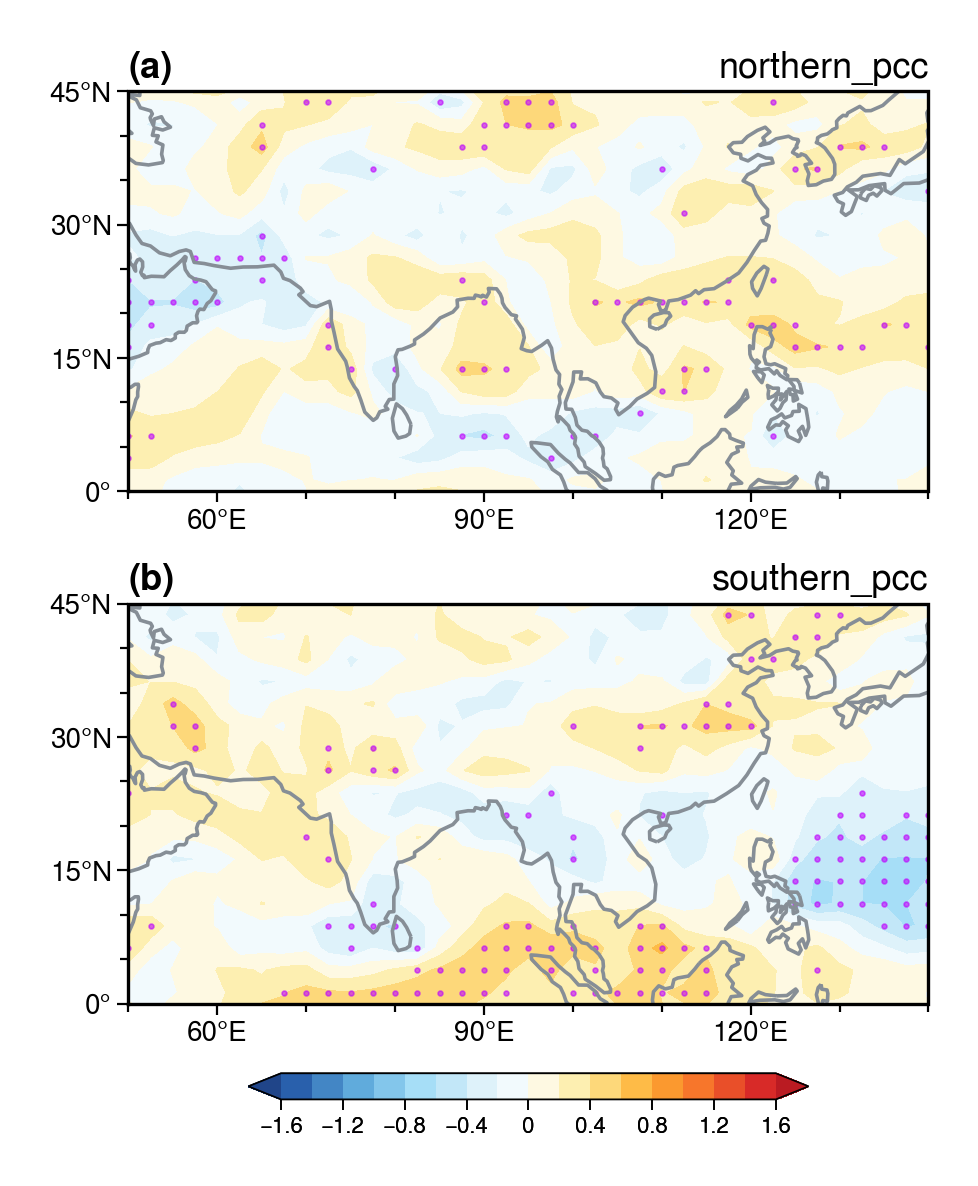

In [27]:
pplt.rc.reset()
pplt.rc.grid = False
# pplt.rc.reset()
cl = 0  # 设置地图投影的中心纬度
proj = pplt.PlateCarree(central_longitude=cl)

fig_pre_ens = pplt.figure(span=False, share=False, refwidth=4.0, wspace=4.0, hspace=4.5, outerpad=2.0)
nrows = 2
ncols = 1
plot_array = np.reshape(range(1, nrows*ncols+1), (nrows, ncols))
axs = fig_pre_ens.subplots(plot_array, proj=proj)

#   set the geo_ticks and map projection to the plots
xticks = np.array([60, 90, 120])  # 设置纬度刻度
yticks = np.arange(0, 46, 15)  # 设置经度刻度
# 设置绘图的经纬度范围extents，其中前两个参数为经度的最小值和最大值，后两个数为纬度的最小值和最大值
# 当想要显示的经纬度范围不是正好等于刻度显示范围时，对extents进行相应的修改即可
extents = [50.0, 140.0, yticks[0], 45.0]
sepl.geo_ticks(axs, xticks, yticks, cl, extents, majorticklabelsize=10)

# ===================================================
ski = 2
n = 1
w, h = 0.12, 0.14
# ===================================================
# ensemble
con = axs[0].contourf(
    IndR_his_pre_northern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_his_pre_northern_pcc_rvalue, axs[0], n, np.where(IndR_his_pre_northern_pcc_pvalue[::n, ::n] <= 0.10), "bright purple", 12.0,
)

axs[0].format(
    ltitle="", rtitle="northern_pcc",
)
# ===================================================
con = axs[1].contourf(
    IndR_his_pre_southern_pcc_rvalue,
    cmap="ColdHot",
    cmap_kw={"left": 0.06, "right": 0.94},
    levels=np.arange(-1.6,1.7,0.2),
    zorder=0.8,
    extend="both"
    )
sepl.plt_sig(
    IndR_his_pre_southern_pcc_rvalue, axs[1], n, np.where(IndR_his_pre_southern_pcc_pvalue[::n, ::n] <= 0.10), "bright purple", 12.0,
)

axs[1].format(
    ltitle="", rtitle="southern_pcc",
)
# ===================================================

cb = fig_pre_ens.colorbar(con, loc="b", width=0.13, length=0.7, label="", ticklabelsize=8)
cb.set_ticks(np.arange(-2.0,2.1, 0.4))
axs.format(linewidth=1.2)
fig_pre_ens.format(abc="(a)", abcloc="l", rc_kw={"grid": False, "reso": "lo", "figure.facecolor":"white", "font.large": 13})
pplt.rc.reset()